In [671]:
import pandas as pd
from sklearn import preprocessing
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import numpy as np

Read the data

In [672]:
df = pd.read_csv('data\\dataR2.csv')
df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


Plot each feature based on the label

Feature: Age
Feature: BMI
Feature: Glucose
Feature: Insulin
Feature: HOMA
Feature: Leptin
Feature: Adiponectin
Feature: Resistin
Feature: MCP.1


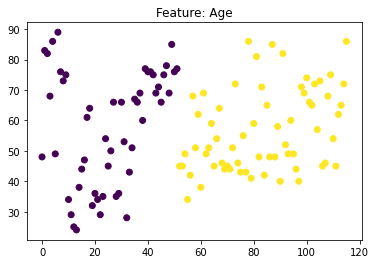

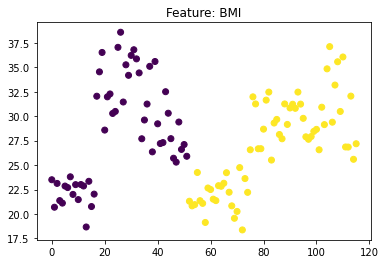

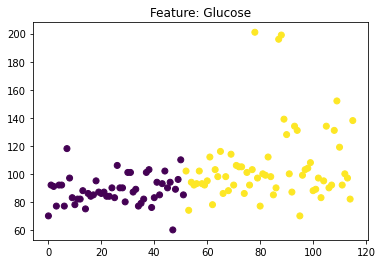

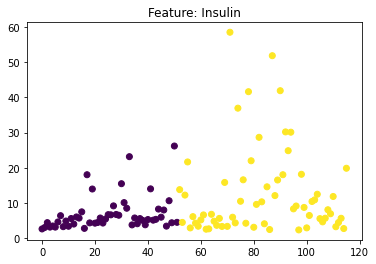

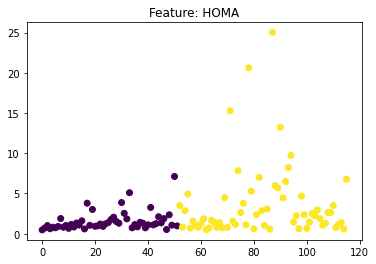

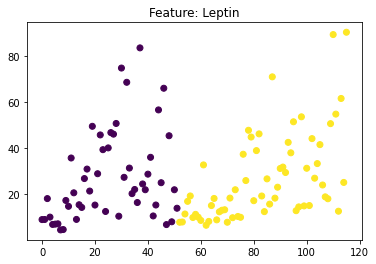

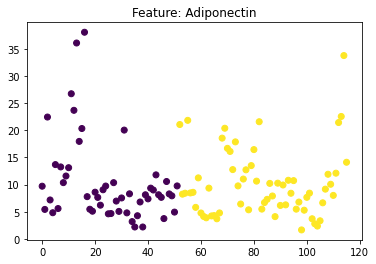

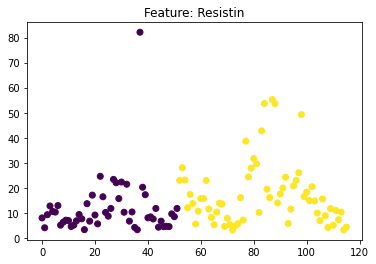

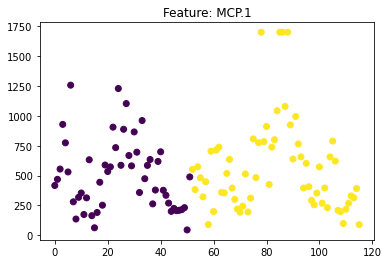

In [673]:
for c in df.columns:
    if c != 'Classification':
        plt.scatter(range(len(df)), df[c], c=df['Classification'])
        title = 'Feature: ' + c
        print(title)
        plt.title(title)
        plt.show()

Plot each data label based on two feature

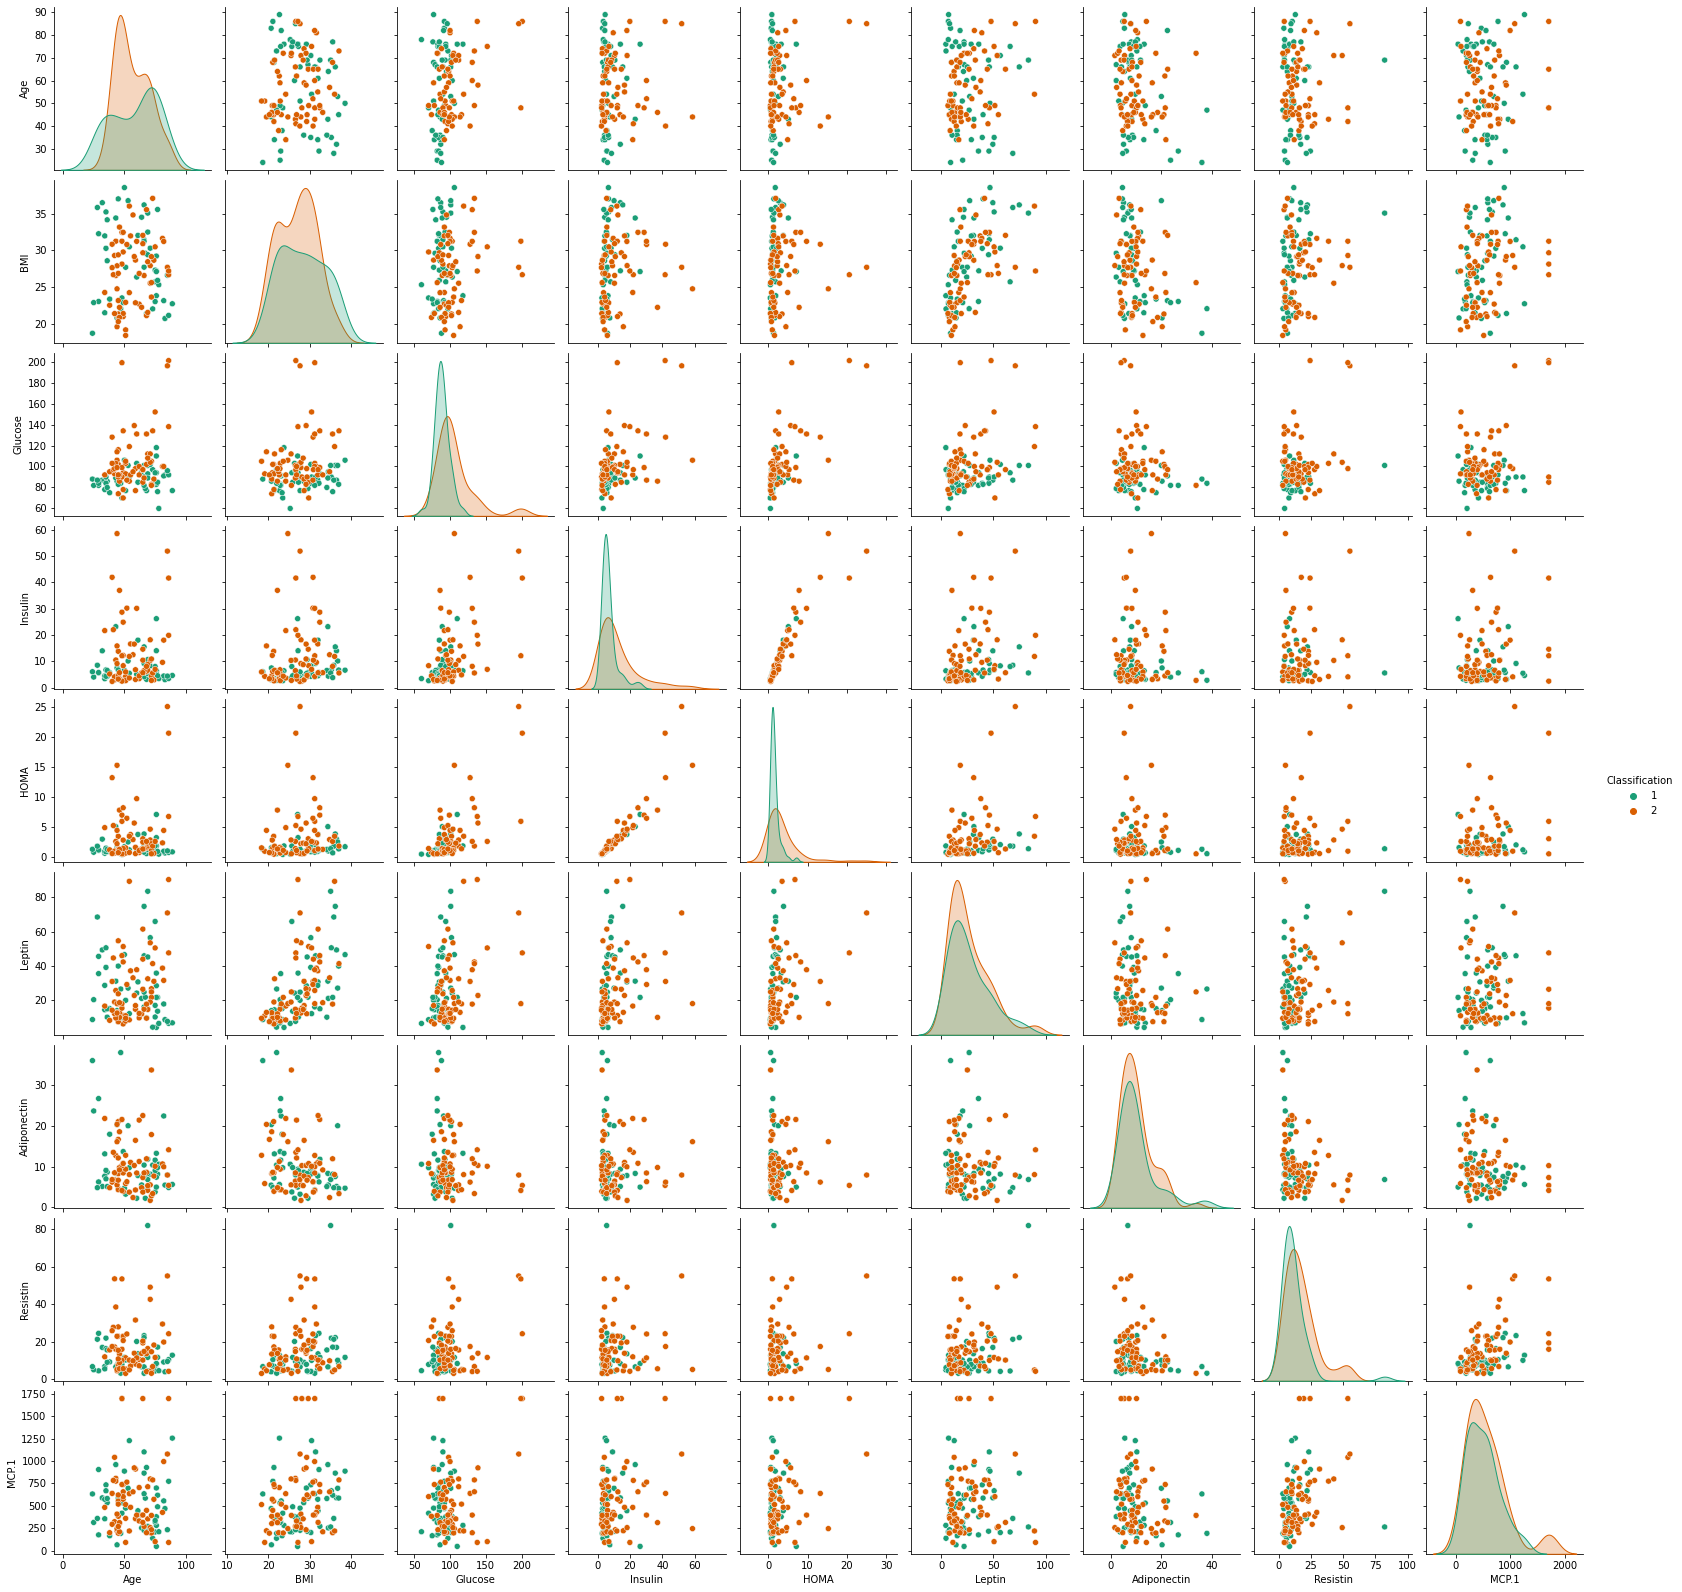

In [674]:
# pairplot with hue Classification
sns.pairplot(df, hue='Classification',palette='Dark2')
plt.show()


Feature Engineering and plot correlation heatmap

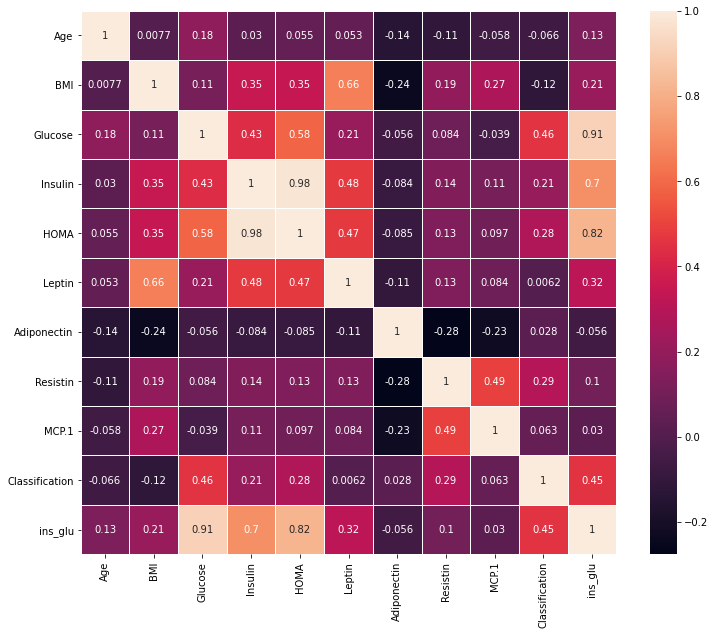

In [675]:
df['ins_glu'] = df[["Insulin", "Glucose"]].mean(axis=1)
# df['bmi_lep_age'] = (df['BMI'] / df['Leptin']) * df['Age']

f1, ax1 = plt.subplots(figsize=(12,10))
# sns.heatmap(df.corr(), annot = True, linewidths=0.5)
sns.heatmap(df.corr(method='spearman'), annot = True, linewidths=0.5)
plt.savefig('All_Features_CorrelationMatrix.png')
plt.show()

Feature Selection

In [676]:
X = df.drop(['Insulin', 'Glucose', 'HOMA', 'Leptin', 'Adiponectin', 'MCP.1', 'Age', 'Classification'], axis=1)
y = df['Classification']

X.columns

Index(['BMI', 'Resistin', 'ins_glu'], dtype='object')

Normalizing Data And Preparing Test And Train Data Sets

In [677]:
x = X.values #returns a numpy array
min_max = preprocessing.MinMaxScaler()
x_scaled = min_max.fit_transform(x)

kf = KFold(n_splits=5, random_state=42, shuffle=True)
df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification,ins_glu
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1,36.3535
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1,47.5575
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1,47.7490
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1,40.1130
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1,47.7745


KFold validation

In [678]:
def kfold_validation(classifier):
    all_train_acc = []
    all_test_acc = []
    for train_index, test_index in kf.split(X):
        x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
        y_train_fold, y_test_fold = y[train_index], y[test_index]

        print('Train Label Distribution')
        y_train_dist = y_train_fold.groupby(y_train_fold).describe()
        y_train_dist['percentage'] = y_train_dist['count'] / len(y_train_fold)
        print(y_train_dist[['count', 'percentage']])
        print()
        print('Test Label Distribution')
        y_test_dist = y_test_fold.groupby(y_test_fold).describe()
        y_test_dist['percentage'] = y_test_dist['count'] / len(y_test_fold)
        print(y_test_dist[['count', 'percentage']])
        print()

        classifier.fit(x_train_fold, y_train_fold)
        classifier.predict(x_train_fold)
        print(classifier.best_params_)
        train_accuracy = classifier.score(x_train_fold, y_train_fold)
        print('Train Accuracy:', train_accuracy)
        all_train_acc.append(train_accuracy)
        classifier.predict(x_test_fold)
        test_accuracy = classifier.score(x_test_fold, y_test_fold)
        print('Test Accuracy:', test_accuracy)
        all_test_acc.append(test_accuracy)
        print(40 * '-')
        print()

    print('Average Train Accuracy:', np.mean(all_train_acc))
    print('Average Test Accuracy:', np.mean(all_test_acc))


Build and test Logistic Regression model

In [679]:
clf = LogisticRegression(random_state=0, solver='liblinear')
# clf = LogisticRegression(random_state=0, penalty='l2', solver='liblinear')

# defining parameter range
param_grid = {
    'penalty': ['l1', 'l2']
}
lr_grid = GridSearchCV(clf, param_grid,
                        return_train_score=True)
kfold_validation(lr_grid)

Train Label Distribution
                count  percentage
Classification                   
1                40.0    0.434783
2                52.0    0.565217

Test Label Distribution
                count  percentage
Classification                   
1                12.0         0.5
2                12.0         0.5

{'penalty': 'l2'}
Train Accuracy: 0.6739130434782609
Test Accuracy: 0.6666666666666666
----------------------------------------

Train Label Distribution
                count  percentage
Classification                   
1                40.0    0.430108
2                53.0    0.569892

Test Label Distribution
                count  percentage
Classification                   
1                12.0    0.521739
2                11.0    0.478261

{'penalty': 'l1'}
Train Accuracy: 0.7634408602150538
Test Accuracy: 0.43478260869565216
----------------------------------------

Train Label Distribution
                count  percentage
Classification                   
1 

Build and test KNN model

In [680]:
# defining parameter range
param_grid = {
    'n_neighbors': range(1, 50)
}

clf = GridSearchCV(KNeighborsClassifier(), param_grid,
                        return_train_score=True)
kfold_validation(clf)

Train Label Distribution
                count  percentage
Classification                   
1                40.0    0.434783
2                52.0    0.565217

Test Label Distribution
                count  percentage
Classification                   
1                12.0         0.5
2                12.0         0.5

{'n_neighbors': 10}
Train Accuracy: 0.7717391304347826
Test Accuracy: 0.9166666666666666
----------------------------------------

Train Label Distribution
                count  percentage
Classification                   
1                40.0    0.430108
2                53.0    0.569892

Test Label Distribution
                count  percentage
Classification                   
1                12.0    0.521739
2                11.0    0.478261

{'n_neighbors': 47}
Train Accuracy: 0.6989247311827957
Test Accuracy: 0.391304347826087
----------------------------------------

Train Label Distribution
                count  percentage
Classification                   


Build and test Linear SVM model

In [681]:
# defining parameter range
param_grid = {
                'C': [0.01, 0.1, 1, 10, 100],
                'kernel': ['linear']
              }

clf = GridSearchCV(SVC(), param_grid)
kfold_validation(clf)

Train Label Distribution
                count  percentage
Classification                   
1                40.0    0.434783
2                52.0    0.565217

Test Label Distribution
                count  percentage
Classification                   
1                12.0         0.5
2                12.0         0.5

{'C': 100, 'kernel': 'linear'}
Train Accuracy: 0.75
Test Accuracy: 0.875
----------------------------------------

Train Label Distribution
                count  percentage
Classification                   
1                40.0    0.430108
2                53.0    0.569892

Test Label Distribution
                count  percentage
Classification                   
1                12.0    0.521739
2                11.0    0.478261

{'C': 100, 'kernel': 'linear'}
Train Accuracy: 0.7849462365591398
Test Accuracy: 0.6956521739130435
----------------------------------------

Train Label Distribution
                count  percentage
Classification                   
1   

Build and test non-Linear SVM model

In [682]:
# defining parameter range
param_grid = {'C': [1, 10, 100, 1000, 10000, 10**5, 10**6],
              # 'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'sigmoid', 'poly']}

clf = GridSearchCV(SVC(gamma='auto'), param_grid)
kfold_validation(clf)

Train Label Distribution
                count  percentage
Classification                   
1                40.0    0.434783
2                52.0    0.565217

Test Label Distribution
                count  percentage
Classification                   
1                12.0         0.5
2                12.0         0.5

{'C': 100, 'kernel': 'rbf'}
Train Accuracy: 0.7934782608695652
Test Accuracy: 0.875
----------------------------------------

Train Label Distribution
                count  percentage
Classification                   
1                40.0    0.430108
2                53.0    0.569892

Test Label Distribution
                count  percentage
Classification                   
1                12.0    0.521739
2                11.0    0.478261

{'C': 100000, 'kernel': 'rbf'}
Train Accuracy: 0.8924731182795699
Test Accuracy: 0.6956521739130435
----------------------------------------

Train Label Distribution
                count  percentage
Classification             

Build and test Decision Tree model

In [683]:
# defining parameter range
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': range(1, 10)
              }

clf = GridSearchCV(DecisionTreeClassifier(), param_grid)
kfold_validation(clf)

Train Label Distribution
                count  percentage
Classification                   
1                40.0    0.434783
2                52.0    0.565217

Test Label Distribution
                count  percentage
Classification                   
1                12.0         0.5
2                12.0         0.5

{'criterion': 'gini', 'max_depth': 1}
Train Accuracy: 0.7282608695652174
Test Accuracy: 0.75
----------------------------------------

Train Label Distribution
                count  percentage
Classification                   
1                40.0    0.430108
2                53.0    0.569892

Test Label Distribution
                count  percentage
Classification                   
1                12.0    0.521739
2                11.0    0.478261

{'criterion': 'gini', 'max_depth': 3}
Train Accuracy: 0.9032258064516129
Test Accuracy: 0.6521739130434783
----------------------------------------

Train Label Distribution
                count  percentage
Classificat